<a href="https://colab.research.google.com/github/Amira126/Hugging-Face-Platform-and-its-API/blob/main/Text_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [4]:
model_id = "dreamlike-art/dreamlike-diffusion-1.0"

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
prompt = "a nerdy girl with glasses and long hair, focusing on multiple tasks with a look of determination and a smile of victory"

In [7]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

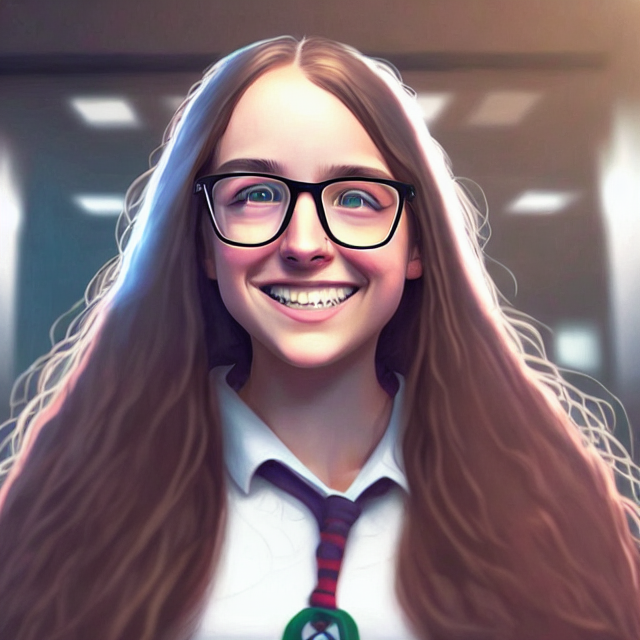

In [8]:
image

# **Stable Diffusion Parameters**

- Negative Propmting
- num_inference_steps
- height
- weight
- num_images_per_prompt

In [9]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images > 1:
    fig, ax = plt.subplots(nrows =1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off")
  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis("off")

  plt.tight_layout()

In [10]:
prompt = "a nerdy girl with glasses and long hair, focusing on multiple tasks with a look of determination and a smile of victory"
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

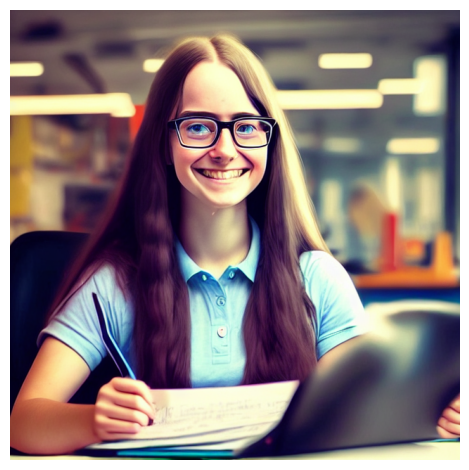

In [11]:
generate_image(pipe, prompt, params)

## **num inference steps**

  0%|          | 0/100 [00:00<?, ?it/s]

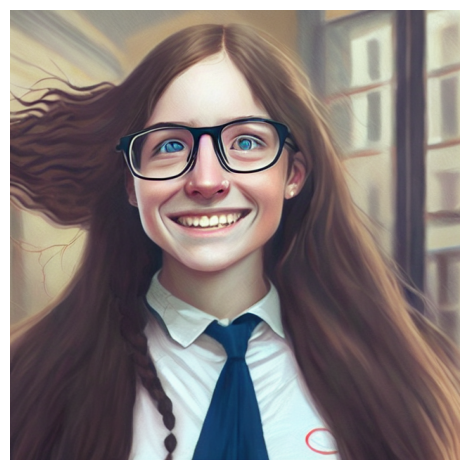

In [12]:
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)

## **height width**

  0%|          | 0/100 [00:00<?, ?it/s]

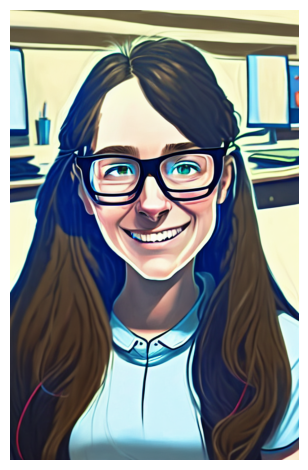

In [14]:
params = {'num_inference_steps': 100, 'width': 512, 'height': 800}
generate_image(pipe, prompt, params)

## **num images per prompt**

  0%|          | 0/100 [00:00<?, ?it/s]

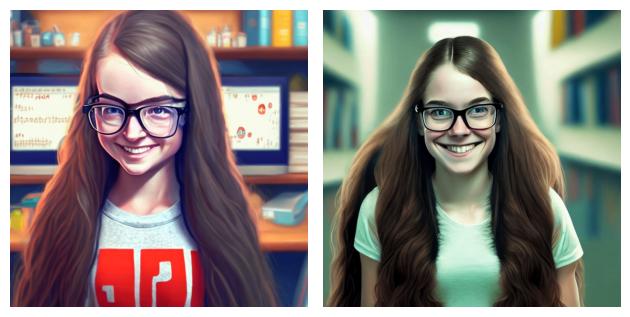

In [15]:
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}
generate_image(pipe, prompt, params)

In [19]:
prompt = "dreamlike, beautiful nerdy girl with glasses and long hair in a very colorful picture with high resolution, focusing on multiple tasks with a look of determination and a smile of victory, sitting on a desk"

  0%|          | 0/100 [00:00<?, ?it/s]

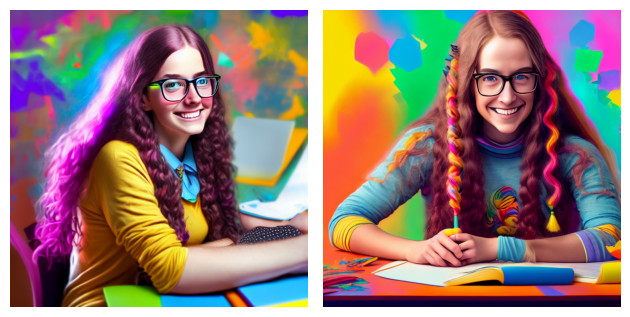

In [20]:
generate_image(pipe, prompt, params)